## **Importacion de librerias**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## **Carga Datos**

In [7]:
df_tweets = pd.read_json('tweets_dataset.json')

print(df_tweets.head())

   id                                               user  \
0   1  {'username': 'newsjunkie', 'handle': '@newsjun...   
1   2  {'username': 'codeandpolitics', 'handle': '@co...   
2   3  {'username': 'voxlibre', 'handle': '@voxlibre'...   
3   4  {'username': 'joao', 'handle': '@joao', 'verif...   
4   5  {'username': 'policywonk', 'handle': '@policyw...   

                                                meta  \
0  {'created_at': '2025-02-19', 'hashtags': ['#Ta...   
1  {'created_at': '2025-04-03', 'hashtags': ['#Ed...   
2  {'created_at': '2025-02-19', 'hashtags': ['#Vo...   
3  {'created_at': '2025-01-10', 'hashtags': ['#Ta...   
4  {'created_at': '2025-03-29', 'hashtags': ['#Bu...   

                                             payload  \
0  {'tweet': {'content': 'Grinning ear‑to‑ear—aft...   
1  {'tweet': {'content': 'My heart aches watching...   
2  {'tweet': {'content': 'Every rumor of ballooni...   
3  {'tweet': {'content': 'Politicians clinking gl...   
4  {'tweet': {'content

Creamos un nuevo df con las columnas deseadas.

In [8]:
df = pd.json_normalize(df_tweets.to_dict('records'))[['id', 'user.handle', 'meta.created_at', 'meta.hashtags', 'payload.tweet.content']]
df.columns = ['id', 'handle', 'created_at', 'hashtags', 'content']

df.head()

,id,handle,created_at,hashtags,content
0,1,@newsjunkie,2025-02-19,[#TaxReform],Grinning ear‑to‑ear—after months of sleepless ...
1,2,@codeandpolitics,2025-04-03,"[#Education, #Election2024]",My heart aches watching families split apart b...
2,3,@voxlibre,2025-02-19,[#Vote],Every rumor of ballooning defense funds tighte...
3,4,@joao,2025-01-10,[#TaxReform],Politicians clinking glasses over the election...
4,5,@policywonk,2025-03-29,"[#Budget2025, #Freedom]","If this tax overhaul gets rubber‑stamped, stor..."


## **Exploración Inicial de Datos**

Visualizamos los tipos de datos del df y la existencia de valores nulos.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          100 non-null    int64 
 1   handle      100 non-null    object
 2   created_at  100 non-null    object
 3   hashtags    100 non-null    object
 4   content     100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


## **Limpieza de Datos**

El dataset no posee valores nulos por lo que no es necesario realizar una limpieza de datos de este motivo. Sin embargo vamos a cambiar el formato de 'created_at' por datetime para facilitar su manejo.

In [10]:
df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          100 non-null    int64         
 1   handle      100 non-null    object        
 2   created_at  100 non-null    datetime64[ns]
 3   hashtags    100 non-null    object        
 4   content     100 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.0+ KB


## **Visualización de Datos**

Visualizamos la cantidad de hashtags en el dataset y cuanto aparecen en total.

In [11]:
# Visualiza la cantidad de valores unicos en los hashtags
hashtags_uniques = df['hashtags'].explode().unique()
print(f'Cantidad de valores unicos en los hashtags: {len(hashtags_uniques)}')

# Visualiza la cantidad de apariciones en el df
hashtags_counts = df['hashtags'].explode().value_counts()
print('Cantidad de apariciones en el df:')
print(hashtags_counts)

Cantidad de valores unicos en los hashtags: 10
Cantidad de apariciones en el df:
hashtags
#Democracy        27
#Election2024     23
#Justice          22
#Vote             22
#Freedom          21
#TaxReform        21
#ClimateAction    20
#Budget2025       20
#Healthcare       19
#Education        18
Name: count, dtype: int64


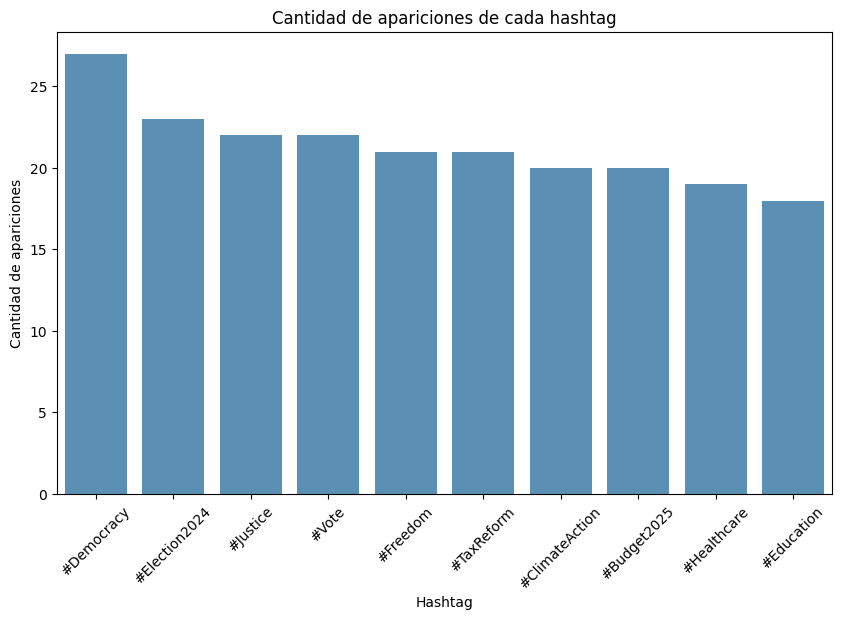

In [12]:
# Grafica las apariciones de cada hashtag
plt.figure(figsize=(10, 6))
sns.barplot(x=hashtags_counts.index, y=hashtags_counts.values, alpha=0.8)
plt.title('Cantidad de apariciones de cada hashtag')
plt.xlabel('Hashtag')
plt.ylabel('Cantidad de apariciones')
plt.xticks(rotation=45)
plt.show()

Visualizamos la longitud de los tweets en el dataset.

Media: 106.74
Valor minimo: 75
Valor maximo: 139


<Axes: xlabel='content', ylabel='Count'>

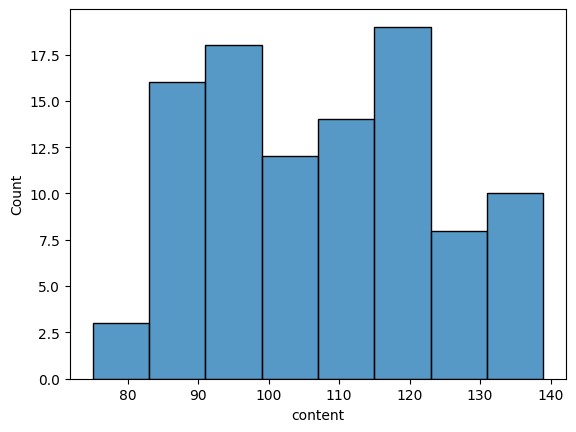

In [13]:
print(f"Media: {df['content'].str.len().mean()}")
print(f"Valor minimo: {df['content'].str.len().min()}")
print(f"Valor maximo: {df['content'].str.len().max()}")
sns.histplot(data=df, x=df['content'].str.len())
